# WeatherPY


In [1]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

In [3]:
# Import API key
from api_keys import weather_api_key


In [4]:
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

In [5]:
# Output File (CSV)
output_data_file = "output_data/cities.csv"

In [6]:
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Generate Cities List

In [7]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

In [8]:
# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name 
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        lat_list = lat_lng[0]
        lng_list = lat_lng[1]   
        
# Print the city count to confirm sufficient count
len(cities)

611

# Perform API Calls

In [9]:
city_data = []

In [10]:

#Loop through and get data
for i, city in enumerate(cities): 
    try:
        base_url = "https://api.openweathermap.org/data/2.5/weather?q="
        query_url = f"{base_url}{city}&units=imperial&appid={weather_api_key}"
        response = requests.get(query_url).json()
        
        #Append lists
        city_name = response["name"]
        temps_all = response['main']['temp']
        hum_all = response['main']['humidity']
        cloud_all = response['clouds']['all']
        wind_all = response['wind']['speed']
        city_name = response['name']
        cntry_all = response['sys']['country']
        date = response['dt']
        lat_list = response["coord"]["lat"]
        lng_list = response["coord"]["lon"]
        
        city_data.append({
            "City": city_name,
            "Temperature": temps_all,
            "Humidity": hum_all,
            "Clouds": cloud_all,
            "Winds": wind_all,
            "Country": cntry_all,
            "Date": date,
            "Latitude": lat_list,
            "Longitude": lng_list
        })
        
        print(f"City Name: {city}, City Number: {i}")    

    except Exception as e:
        
        print(f"City Name: {city}, Not Found")
        pass
    
    
print("---------------------") 
print("Data Retrieval Complete") 
print("---------------------")  

City Name: ushuaia, City Number: 0
City Name: puerto ayora, City Number: 1
City Name: busselton, City Number: 2
City Name: gamba, City Number: 3
City Name: ostrovnoy, City Number: 4
City Name: yellowknife, City Number: 5
City Name: illoqqortoormiut, Not Found
City Name: flinders, City Number: 7
City Name: vaini, City Number: 8
City Name: qaanaaq, City Number: 9
City Name: jiddah, Not Found
City Name: tuktoyaktuk, City Number: 11
City Name: cherskiy, City Number: 12
City Name: belushya guba, Not Found
City Name: port alfred, City Number: 14
City Name: port elizabeth, City Number: 15
City Name: tatarsk, City Number: 16
City Name: usogorsk, City Number: 17
City Name: cape town, City Number: 18
City Name: mahebourg, City Number: 19
City Name: bambous virieux, City Number: 20
City Name: mizdah, City Number: 21
City Name: izumo, City Number: 22
City Name: vaitupu, Not Found
City Name: east london, City Number: 24
City Name: rudsar, City Number: 25
City Name: mataura, City Number: 26
City Nam

City Name: basoko, City Number: 219
City Name: kodiak, City Number: 220
City Name: porosozero, City Number: 221
City Name: grand river south east, Not Found
City Name: olafsvik, City Number: 223
City Name: bokspits, Not Found
City Name: codrington, City Number: 225
City Name: naze, City Number: 226
City Name: olinda, City Number: 227
City Name: kimbe, City Number: 228
City Name: gat, City Number: 229
City Name: machilipatnam, City Number: 230
City Name: tabou, City Number: 231
City Name: sentyabrskiy, Not Found
City Name: pallasovka, City Number: 233
City Name: nzerekore, City Number: 234
City Name: tecoanapa, City Number: 235
City Name: conde, City Number: 236
City Name: kaitangata, City Number: 237
City Name: san patricio, City Number: 238
City Name: oranjemund, City Number: 239
City Name: phonhong, City Number: 240
City Name: atambua, City Number: 241
City Name: maine-soroa, City Number: 242
City Name: lochem, City Number: 243
City Name: mar del plata, City Number: 244
City Name: iq

City Name: lander, City Number: 437
City Name: khonuu, Not Found
City Name: dzhebariki-khaya, City Number: 439
City Name: robe, City Number: 440
City Name: roald, City Number: 441
City Name: santa fe, City Number: 442
City Name: fortuna, City Number: 443
City Name: envira, City Number: 444
City Name: benguela, City Number: 445
City Name: molina, City Number: 446
City Name: cruzeiro do sul, City Number: 447
City Name: lorengau, City Number: 448
City Name: burnie, City Number: 449
City Name: saldanha, City Number: 450
City Name: rapina, City Number: 451
City Name: ban nahin, City Number: 452
City Name: peleduy, City Number: 453
City Name: valdemarpils, City Number: 454
City Name: prince rupert, City Number: 455
City Name: garissa, City Number: 456
City Name: namatanai, City Number: 457
City Name: portland, City Number: 458
City Name: drochtersen, City Number: 459
City Name: linxia, City Number: 460
City Name: mgachi, City Number: 461
City Name: toora-khem, City Number: 462
City Name: sed

In [144]:
city_data_df = pd.DataFrame(city_data)

### SAVE THIS AS CSV FOR PART 2
city_data_df.to_csv("CityData.csv", index=False, header=True)

In [12]:
#Remove cities where humidity is > 100%
humid_cities = city_data_df["Humidity"] > 100
humid_cities.describe()

count       565
unique        1
top       False
freq        565
Name: Humidity, dtype: object

In [13]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
city_data_df


,City,Temperature,Humidity,Clouds,Winds,Country,Date,Latitude,Longitude
0,Ushuaia,49.66,37,0,8.05,AR,1666733048,-54.8000,-68.3000
1,Puerto Ayora,68.56,91,81,5.99,EC,1666733602,-0.7393,-90.3518
2,Busselton,53.37,91,66,3.11,AU,1666733206,-33.6500,115.3333
3,Gamba,76.87,89,77,1.45,GA,1666733243,-2.6500,10.0000
4,Ostrovnoy,31.19,88,93,17.43,RU,1666733596,68.0531,39.5131
...,...,...,...,...,...,...,...,...,...
560,Mehamn,33.75,75,0,10.36,NO,1666733675,71.0357,27.8492
561,Orocué,82.54,67,20,0.85,CO,1666733934,4.7912,-71.3354
562,Falkenberg,53.33,96,28,14.05,SE,1666733935,56.9055,12.4912
563,Curitibanos,60.33,77,0,5.08,BR,1666733936,-27.2828,-50.5844


# Plotting the Data
#* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.

#* Save the plotted figures as .pngs.

Text(0, 0.5, 'Temperature')

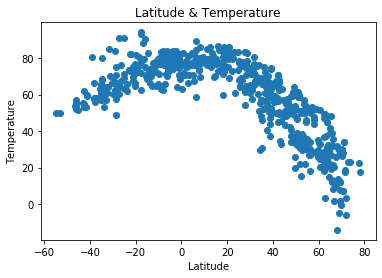

In [20]:
#Latitude/Temp
plt.scatter(city_data_df['Latitude'], city_data_df["Temperature"])
plt.title("Latitude & Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature")

In [28]:
plt.savefig("Latitude&Temperature.png")
plt.show()

#This shows that Southern Hemisphere temperature is much warmer than Northern Hemispher temp.

<Figure size 432x288 with 0 Axes>

Text(0, 0.5, 'Humidity')

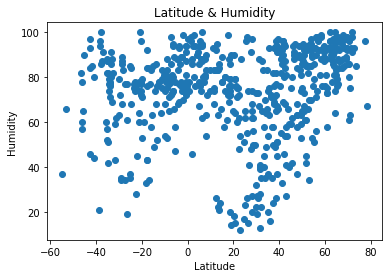

In [29]:
#Latitude/Humidity
plt.scatter(city_data_df['Latitude'], city_data_df["Humidity"])
plt.title("Latitude & Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

In [30]:
plt.savefig("Latitude&Humidity.png")
plt.show()

#Shows no strong relationship between lat and humidity.

<Figure size 432x288 with 0 Axes>

Text(0, 0.5, 'Clouds')

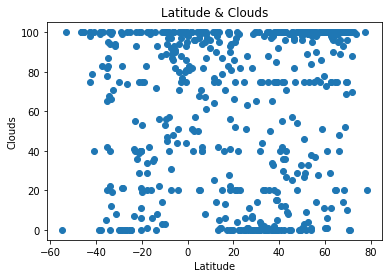

In [33]:
#Latitude/Cloudiness
plt.scatter(city_data_df['Latitude'], city_data_df["Clouds"])
plt.title("Latitude & Clouds")
plt.xlabel("Latitude")
plt.ylabel("Clouds")

In [32]:
plt.savefig("Latitude&Clouds.png")
plt.show()

#This shows  that the relationshop between latitude and cloud cover is not correlated.

<Figure size 432x288 with 0 Axes>

Text(0, 0.5, 'Winds')

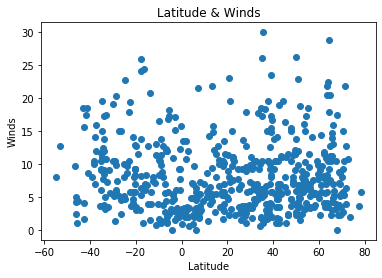

In [34]:
#Latitude/Wind Speed
plt.scatter(city_data_df['Latitude'], city_data_df["Winds"])
plt.title("Latitude & Winds")
plt.xlabel("Latitude")
plt.ylabel("Winds")

In [35]:
plt.savefig("Latitude&Winds.png")
plt.show()

#Latitude doesn't appear to affect winds.

<Figure size 432x288 with 0 Axes>

# Linear Regression


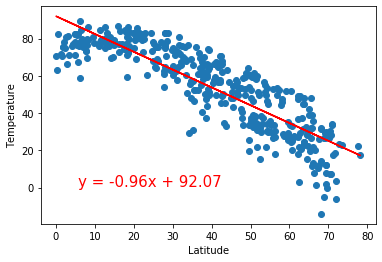

<Figure size 432x288 with 0 Axes>

In [142]:
####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression
lat_temp_df = city_data_df[["Latitude"] + ["Temperature"]]
north_lat_temp_df = lat_temp_df[lat_temp_df["Latitude"] >= 0]
north_lat_temp_df

x_values = north_lat_temp_df['Latitude']
y_values = north_lat_temp_df['Temperature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.show()

plt.savefig("LineReg8.png")
plt.show()

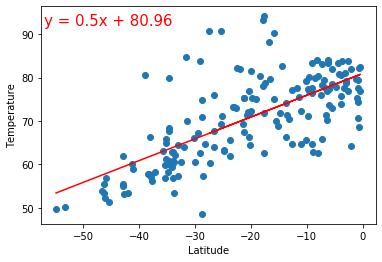

<Figure size 432x288 with 0 Axes>

In [135]:
####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression
lat_temp_df = city_data_df[["Latitude"] + ["Temperature"]]
south_lat_temp_df = lat_temp_df[lat_temp_df["Latitude"] < 0]
south_lat_temp_df

x_values = south_lat_temp_df['Latitude']
y_values = south_lat_temp_df['Temperature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-57,92),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.show()

plt.savefig("LineReg1.png")
plt.show()

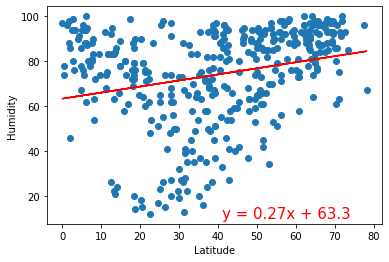

<Figure size 432x288 with 0 Axes>

In [136]:
####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression
lat_hum_df = city_data_df[["Latitude"] + ["Humidity"]]
north_lat_hum_df = lat_hum_df[lat_temp_df["Latitude"] >= 0]
north_lat_hum_df

x_values = north_lat_hum_df['Latitude']
y_values = north_lat_hum_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(41,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

plt.savefig("LineReg2.png")
plt.show()


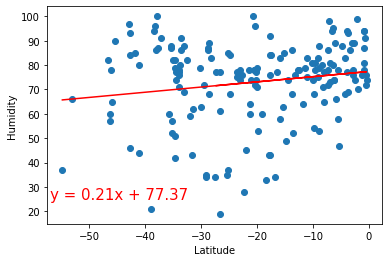

<Figure size 432x288 with 0 Axes>

In [137]:
####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression
lat_hum_df = city_data_df[["Latitude"] + ["Humidity"]]
south_lat_hum_df = lat_hum_df[lat_temp_df["Latitude"] < 0]
south_lat_hum_df

x_values = south_lat_hum_df['Latitude']
y_values = south_lat_hum_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-57,25),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

plt.savefig("LineReg3.png")
plt.show()

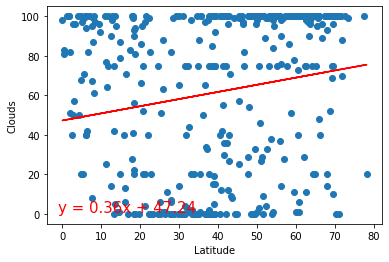

<Figure size 432x288 with 0 Axes>

In [138]:
####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
lat_cloud_df = city_data_df[["Latitude"] + ["Clouds"]]
north_lat_cloud_df = lat_cloud_df[lat_temp_df["Latitude"] >= 0]
north_lat_cloud_df

x_values = north_lat_cloud_df['Latitude']
y_values = north_lat_cloud_df['Clouds']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-1,1),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Clouds')
plt.show()

plt.savefig("LineReg4.png")
plt.show()

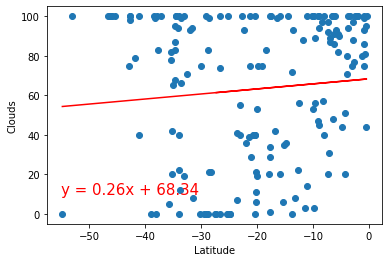

<Figure size 432x288 with 0 Axes>

In [139]:
####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
lat_cloud_df = city_data_df[["Latitude"] + ["Clouds"]]
south_lat_cloud_df = lat_cloud_df[lat_temp_df["Latitude"] < 0]
south_lat_cloud_df

x_values = south_lat_cloud_df['Latitude']
y_values = south_lat_cloud_df['Clouds']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Clouds')
plt.show()

plt.savefig("LineReg5.png")
plt.show()

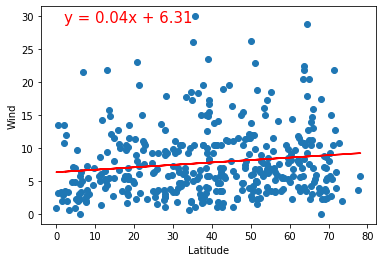

<Figure size 432x288 with 0 Axes>

In [140]:
####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
lat_wind_df = city_data_df[["Latitude"] + ["Winds"]]
north_lat_wind_df = lat_wind_df[lat_temp_df["Latitude"] >= 0]
north_lat_wind_df

x_values = north_lat_wind_df['Latitude']
y_values = north_lat_wind_df['Winds']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(2,29),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind')
plt.show()

plt.savefig("LineReg6.png")
plt.show()

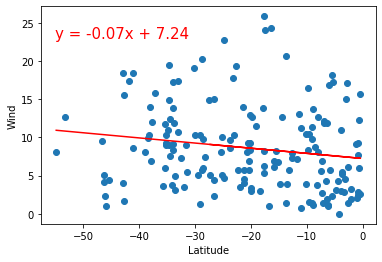

<Figure size 432x288 with 0 Axes>

In [141]:
####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
lat_wind_df = city_data_df[["Latitude"] + ["Winds"]]
south_lat_wind_df = lat_wind_df[lat_temp_df["Latitude"] < 0]
south_lat_wind_df

x_values = south_lat_wind_df['Latitude']
y_values = south_lat_wind_df['Winds']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,23),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind')
plt.show()

plt.savefig("LineReg7.png")
plt.show()